My KMeans V-Score: 0.9751718520750204
Scikit-learn KMeans V-Score: 0.9751718520750204


/home/mluba/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


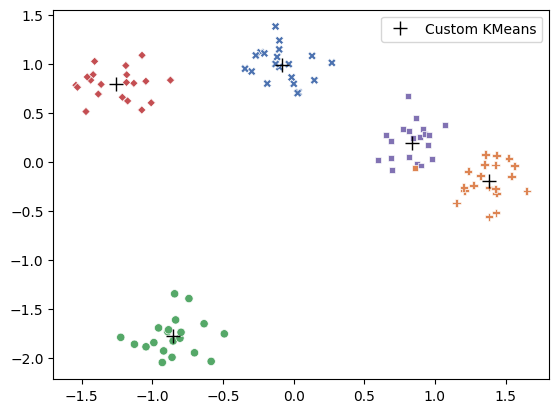

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from cluster import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as SklearnKMeans
from sklearn.metrics.cluster import v_measure_score

# make blobs
centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)

# my custom kmeans
my_kmeans = cluster(n_clusters=centers)
my_kmeans.fit(X_train)
# took inspiration for the evaluate method from an online article
my_class_centers, my_classification = my_kmeans.evaluate(X_train)

# sklearn kmeans
sklearn_kmeans = SklearnKMeans(n_clusters=centers, random_state=42)
sklearn_labels = sklearn_kmeans.fit_predict(X_train)

# v-score calculation for both algorithms
my_vscore = v_measure_score(true_labels, my_classification)
sklearn_vscore = v_measure_score(true_labels, sklearn_labels)

print("My KMeans V-Score:", my_vscore)
print("Scikit-learn KMeans V-Score:", sklearn_vscore)

# plot results
sns.scatterplot(x=[X[0] for X in X_train], y=[X[1] for X in X_train], hue=true_labels, style=my_classification, palette="deep", legend=None)
plt.plot([x for x, _ in my_kmeans.centroids], [y for _, y in my_kmeans.centroids], 'k+', markersize=10, label="Custom KMeans")
plt.legend()
plt.show()

/home/mluba/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


My KMeans V-Score: 0.9751718520750202
Scikit-learn KMeans V-Score: 0.9751718520750204


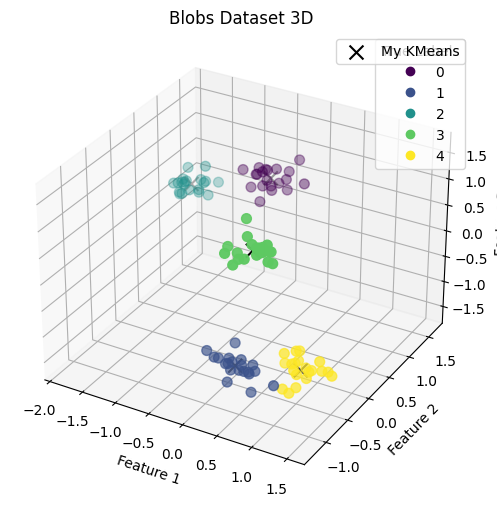

In [2]:
from mpl_toolkits.mplot3d import Axes3D

# make blobs
centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42, n_features=3)
X_train = StandardScaler().fit_transform(X_train)

# my kmeans
my_kmeans = cluster(n_clusters=centers)
my_kmeans.fit(X_train)
my_class_centers, my_classification = my_kmeans.evaluate(X_train)

# sklearn kmeans
sklearn_kmeans = SklearnKMeans(n_clusters=centers, random_state=42)
sklearn_labels = sklearn_kmeans.fit_predict(X_train)

# v-score calculations for both algorithms
my_vscore = v_measure_score(true_labels, my_classification)
sklearn_vscore = v_measure_score(true_labels, sklearn_labels)

print("My KMeans V-Score:", my_vscore)
print("Scikit-learn KMeans V-Score:", sklearn_vscore)

# plot 3d results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# use true labels to help determine accuracy of kmeans (I got help on this part)
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=true_labels, cmap='viridis', s=50)
legend1 = ax.legend(*scatter.legend_elements(), title="True Labels")
ax.add_artist(legend1)
ax.scatter(my_kmeans.centroids[:, 0], my_kmeans.centroids[:, 1], my_kmeans.centroids[:, 2], c='black', marker='x', s=100, label="My KMeans")
ax.legend()

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title("Blobs Dataset 3D")
plt.show()